<a href="https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp?scriptVersionId=115451622" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа

Ранжируем акций из списка голубых фишек Московской биржи по коэффициенту Шарпа для абсолютных курсов. Абсолютные курсы для акций получаем умножением рублевого курса акции на абсолютный курс рубля (данные берем из тетрадки https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki). Ранжирование позволяет выявить самые выгодные для вложения акции. Рейтинги считаем для разных временных промежутков от месяца до 5 лет. 

# Оглавление проекта "Абсолютный валютный курс" 

## Представительства проекта:
[сайт](http://www.abscur.ru)
[ВКонтакте](https://vk.com/abscur)
[WhatsUp](https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs)
[Viber](https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc)
[Telegram](https://t.me/AbsCur)
[Одноклассники](https://ok.ru/group/53547043520717)
[GitHub](https://github.com/prog815/abscur)
[YouTube](https://www.youtube.com/playlist?list=PLG1V24vhSKo6MamGtgm2oTkDZHeHBHNFW)

## Абсолютные валютные курсы:
- [Источник данных с абсолютными курсами](https://www.kaggle.com/code/eavprog/abscur-data) 
- [Последние абсолютные курсы](https://www.kaggle.com/code/eavprog/abscur-posled-kurs)
- [Связь валют на графах через корреляцию](https://www.kaggle.com/code/eavprog/abscur-svyas-valut)
- [Рейтинг абсолютной доходности](https://www.kaggle.com/eavprog/abscur-reyting-dohod)
- [Рейтинг валют по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-sharp)

## Абсолютные курсы голубых фишек Московской биржи
- [Абсолютные курсы голубых фишек Московской биржи](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki)
- [Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp)


# За месяц

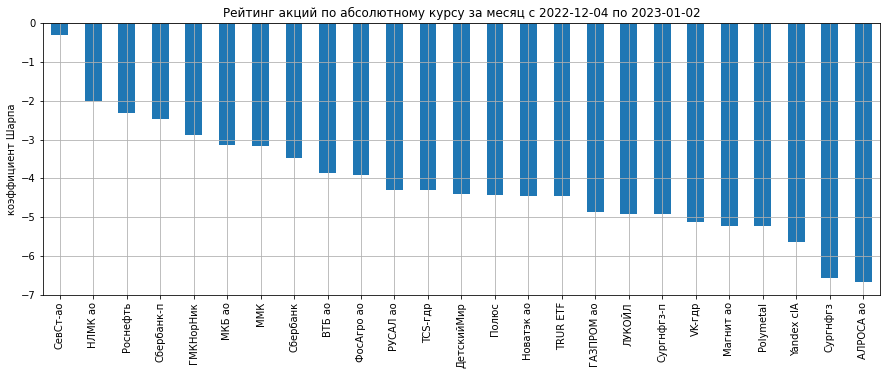

# За квартал

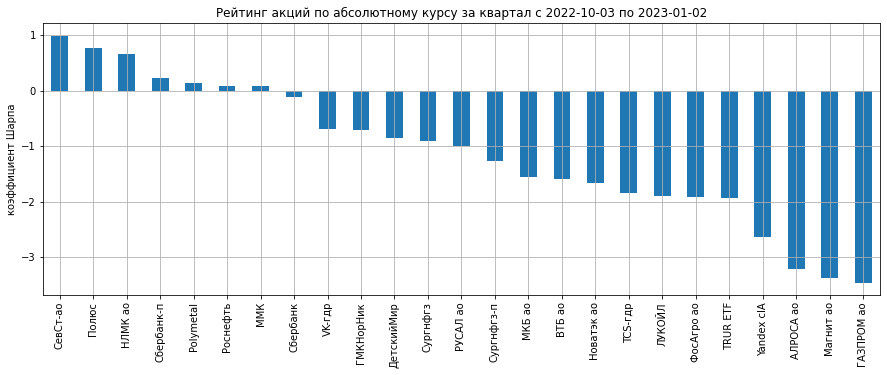

# За полгода

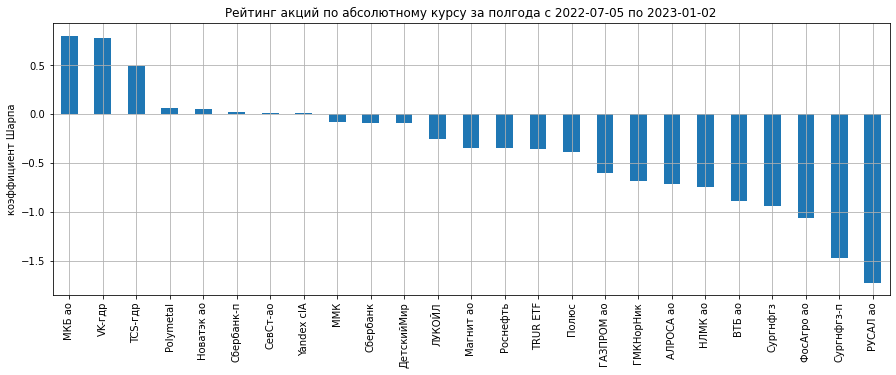

# За год

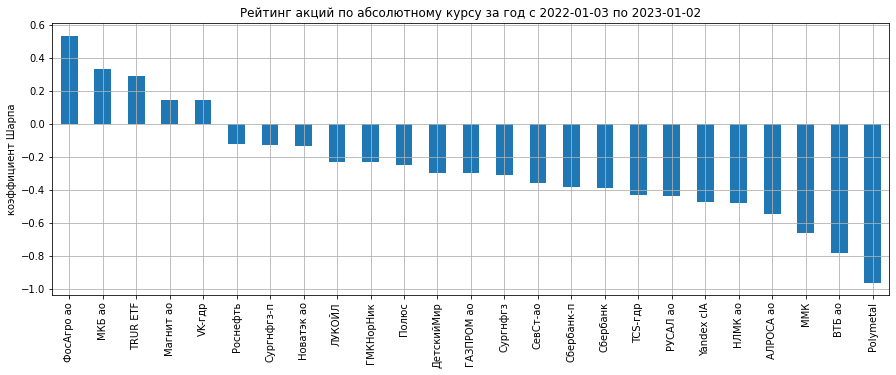

# За 2 года

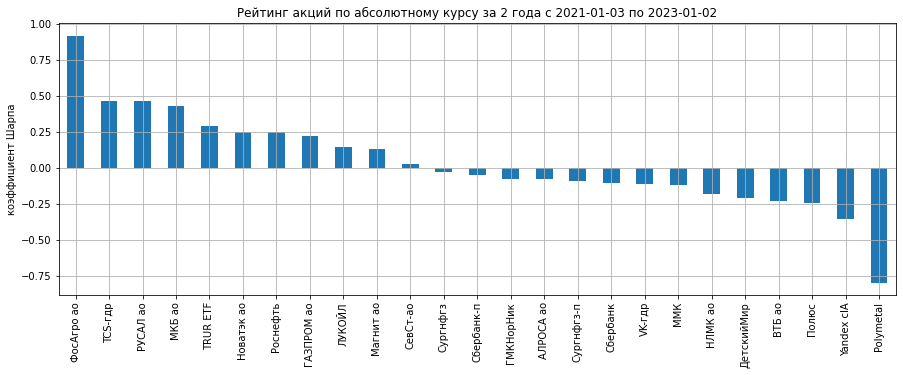

# За 3 года

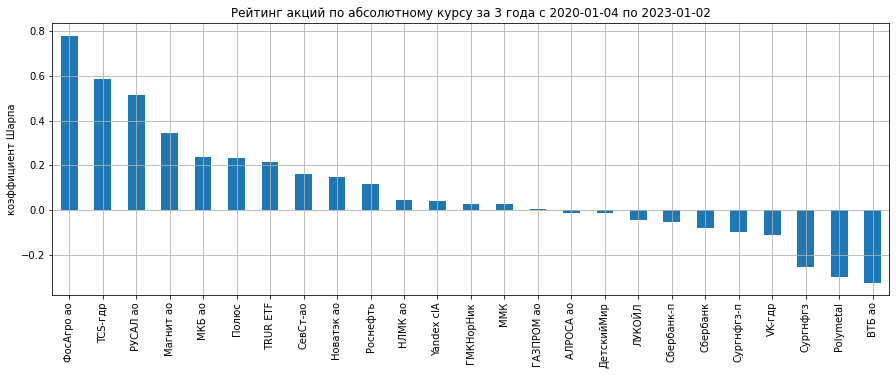

# За 5 лет

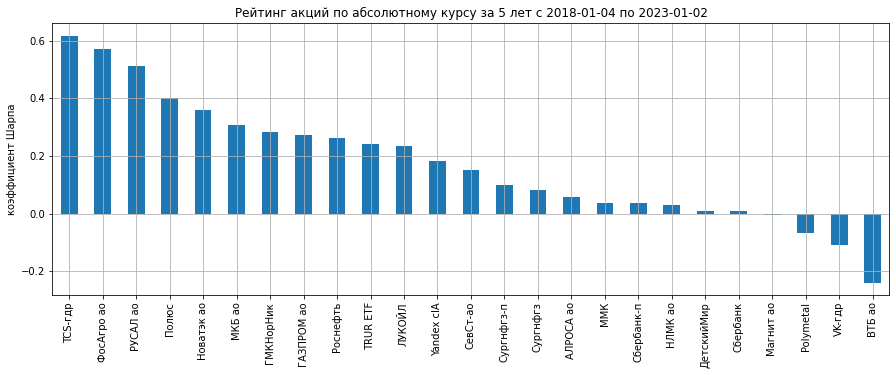

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import abscur_menu

# меню проекта печатаем
abscur_menu.print_menu()

# абсолютные курсы акций подкачиваем
s_abs = pd.read_csv("/kaggle/input/mmvb-abscur-blue-fishki/s_abscur.csv",index_col=0,parse_dates=['Date'])

# расчет коэффициента Шарпа
def sharpe_ratio(return_series, N=255, rf=0.01):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

diap = [[30,"месяц"],[92,"квартал"],[182,"полгода"],[365,"год"],[2*365,"2 года"],[3*365,"3 года"],[5*365,"5 лет"]]

for per,title_per in diap:
    display(Markdown("# За "+title_per))
    
    date_start = s_abs.asfreq(freq="D").index[-per]
    date_finish = s_abs.index[-1]
    
    res = sharpe_ratio(s_abs[s_abs.index >= date_start].pct_change())
    res.sort_values(ascending=False,inplace=True)
    res.plot.bar(grid=True,title="Рейтинг акций по абсолютному курсу за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d"),ylabel="коэффициент Шарпа",legend=False,figsize=(15,5))
    plt.show()
    